In [1]:
from __future__ import print_function

import numpy as np
import os
import argparse
from collections import OrderedDict
import cPickle as pickle

def loadYear(year):
  filename = 'trained_vectors/vectors-{}-ngram.txt'.format(year)
  mapping = OrderedDict()
  with open(filename, 'r') as f:
    for line in f:
      row = line.strip().split()
      w = row[0]
      v = [float(x) for x in row[1:]]
      mapping[w] = v
  return mapping


Load the pre-trained vectors

In [2]:
years = [1900 + x for x in range(101)]

models = OrderedDict()
for year in years:
    models[year] = loadYear(year)
    print("year {}: {} tokens".format(year, len(models[year])))


year 1900: 33467 tokens
year 1901: 33550 tokens
year 1902: 31427 tokens
year 1903: 31929 tokens
year 1904: 32722 tokens
year 1905: 29929 tokens
year 1906: 33109 tokens
year 1907: 29951 tokens
year 1908: 31808 tokens
year 1909: 27909 tokens
year 1910: 31203 tokens
year 1911: 32299 tokens
year 1912: 28369 tokens
year 1913: 26086 tokens
year 1914: 26094 tokens
year 1915: 21992 tokens
year 1916: 25098 tokens
year 1917: 26737 tokens
year 1918: 23170 tokens
year 1919: 23348 tokens
year 1920: 28375 tokens
year 1921: 25499 tokens
year 1922: 28835 tokens
year 1923: 26057 tokens
year 1924: 23384 tokens
year 1925: 26708 tokens
year 1926: 24187 tokens
year 1927: 24636 tokens
year 1928: 23446 tokens
year 1929: 23687 tokens
year 1930: 23215 tokens
year 1931: 24308 tokens
year 1932: 21488 tokens
year 1933: 21708 tokens
year 1934: 20426 tokens
year 1935: 21510 tokens
year 1936: 21990 tokens
year 1937: 24974 tokens
year 1938: 20721 tokens
year 1939: 19270 tokens
year 1940: 19822 tokens
year 1941: 19860

Extract a commom set of tokens. We will compare the shift of language using the set of common
tokens. Pairwise inner product (PIP) matrices will be constructed that captures the meanings
of the tokens.

In [3]:
tokens = models[years[0]].keys()
# extract common vocab from two embeddings
for year in years:
    tokens_tmp = models[year].keys()
    tokens = list(set(tokens).intersection(tokens_tmp))
subsample = len(tokens)
if subsample:
  tokens = np.random.choice(tokens, size = subsample, replace=False)
print(len(tokens))


14076


In [4]:
paired_embeds = {}
for token in tokens:
    paired_embeds[token] = []
    for year in years:
        paired_embeds[token].append(models[year][token])

# del models
print("{} tokens to be compared".format(len(paired_embeds)))

14076 tokens to be compared


In [5]:
normalize = True
Es = OrderedDict()
for idx, year in enumerate(years):
    Es[year] = []
    for token in tokens:
        Es[year].append(paired_embeds[token][idx])
    Es[year] = np.array(Es[year])
    if normalize:
        Es[year] = Es[year] / np.linalg.norm(Es[year], axis=1)[:,None]
del paired_embeds

Now, consider the PIP loss between embeddings between different years. Depending on the size, 
we use two solutions. It depends on if the PIP matrices are small enough to fit in memory.

In [6]:
num_anchors = 10000
# num_anchors > 2000 may not fit in memory (128G)
fit_in_memory = False
PIP_losses = np.zeros((len(years), len(years)))
if fit_in_memory:
    # note that the authors normalized the vectors of unit length
    anchored_PIPs = OrderedDict()
    for year in years:
        anchored_PIPs[year] = Es[year].dot(Es[year].T)
    for idx1, year1 in enumerate(years):
        for idx2, year2 in enumerate(years):
            PIP_diff = anchored_PIPs[year1] - anchored_PIPs[year2]
            PIP_loss = np.linalg.norm(PIP_diff, 'fro')
            PIP_losses[idx1, idx2] = PIP_loss
else:
    for idx1, year1 in enumerate(years):
        PIP1 = Es[year1].dot(Es[year1].T)
        for idx2, year2 in enumerate(years):
            print("processing ({}, {})".format(idx1, idx2))
            PIP2 = Es[year2].dot(Es[year2].T)
            PIP_diff = PIP1 - PIP2
            PIP_loss = np.linalg.norm(PIP_diff, 'fro')
            PIP_losses[idx1, idx2] = PIP_loss

processing (0, 0)
processing (0, 1)
processing (0, 2)
processing (0, 3)
processing (0, 4)
processing (0, 5)
processing (0, 6)
processing (0, 7)
processing (0, 8)
processing (0, 9)
processing (0, 10)
processing (0, 11)
processing (0, 12)
processing (0, 13)
processing (0, 14)
processing (0, 15)
processing (0, 16)
processing (0, 17)
processing (0, 18)
processing (0, 19)
processing (0, 20)
processing (0, 21)
processing (0, 22)
processing (0, 23)
processing (0, 24)
processing (0, 25)
processing (0, 26)
processing (0, 27)
processing (0, 28)
processing (0, 29)
processing (0, 30)
processing (0, 31)
processing (0, 32)
processing (0, 33)
processing (0, 34)
processing (0, 35)
processing (0, 36)
processing (0, 37)
processing (0, 38)
processing (0, 39)
processing (0, 40)
processing (0, 41)
processing (0, 42)
processing (0, 43)
processing (0, 44)
processing (0, 45)
processing (0, 46)
processing (0, 47)
processing (0, 48)
processing (0, 49)
processing (0, 50)
processing (0, 51)
processing (0, 52)
pro

processing (4, 30)
processing (4, 31)
processing (4, 32)
processing (4, 33)
processing (4, 34)
processing (4, 35)
processing (4, 36)
processing (4, 37)
processing (4, 38)
processing (4, 39)
processing (4, 40)
processing (4, 41)
processing (4, 42)
processing (4, 43)
processing (4, 44)
processing (4, 45)
processing (4, 46)
processing (4, 47)
processing (4, 48)
processing (4, 49)
processing (4, 50)
processing (4, 51)
processing (4, 52)
processing (4, 53)
processing (4, 54)
processing (4, 55)
processing (4, 56)
processing (4, 57)
processing (4, 58)
processing (4, 59)
processing (4, 60)
processing (4, 61)
processing (4, 62)
processing (4, 63)
processing (4, 64)
processing (4, 65)
processing (4, 66)
processing (4, 67)
processing (4, 68)
processing (4, 69)
processing (4, 70)
processing (4, 71)
processing (4, 72)
processing (4, 73)
processing (4, 74)
processing (4, 75)
processing (4, 76)
processing (4, 77)
processing (4, 78)
processing (4, 79)
processing (4, 80)
processing (4, 81)
processing (

processing (8, 60)
processing (8, 61)
processing (8, 62)
processing (8, 63)
processing (8, 64)
processing (8, 65)
processing (8, 66)
processing (8, 67)
processing (8, 68)
processing (8, 69)
processing (8, 70)
processing (8, 71)
processing (8, 72)
processing (8, 73)
processing (8, 74)
processing (8, 75)
processing (8, 76)
processing (8, 77)
processing (8, 78)
processing (8, 79)
processing (8, 80)
processing (8, 81)
processing (8, 82)
processing (8, 83)
processing (8, 84)
processing (8, 85)
processing (8, 86)
processing (8, 87)
processing (8, 88)
processing (8, 89)
processing (8, 90)
processing (8, 91)
processing (8, 92)
processing (8, 93)
processing (8, 94)
processing (8, 95)
processing (8, 96)
processing (8, 97)
processing (8, 98)
processing (8, 99)
processing (8, 100)
processing (9, 0)
processing (9, 1)
processing (9, 2)
processing (9, 3)
processing (9, 4)
processing (9, 5)
processing (9, 6)
processing (9, 7)
processing (9, 8)
processing (9, 9)
processing (9, 10)
processing (9, 11)
pr

processing (12, 75)
processing (12, 76)
processing (12, 77)
processing (12, 78)
processing (12, 79)
processing (12, 80)
processing (12, 81)
processing (12, 82)
processing (12, 83)
processing (12, 84)
processing (12, 85)
processing (12, 86)
processing (12, 87)
processing (12, 88)
processing (12, 89)
processing (12, 90)
processing (12, 91)
processing (12, 92)
processing (12, 93)
processing (12, 94)
processing (12, 95)
processing (12, 96)
processing (12, 97)
processing (12, 98)
processing (12, 99)
processing (12, 100)
processing (13, 0)
processing (13, 1)
processing (13, 2)
processing (13, 3)
processing (13, 4)
processing (13, 5)
processing (13, 6)
processing (13, 7)
processing (13, 8)
processing (13, 9)
processing (13, 10)
processing (13, 11)
processing (13, 12)
processing (13, 13)
processing (13, 14)
processing (13, 15)
processing (13, 16)
processing (13, 17)
processing (13, 18)
processing (13, 19)
processing (13, 20)
processing (13, 21)
processing (13, 22)
processing (13, 23)
processin

processing (16, 83)
processing (16, 84)
processing (16, 85)
processing (16, 86)
processing (16, 87)
processing (16, 88)
processing (16, 89)
processing (16, 90)
processing (16, 91)
processing (16, 92)
processing (16, 93)
processing (16, 94)
processing (16, 95)
processing (16, 96)
processing (16, 97)
processing (16, 98)
processing (16, 99)
processing (16, 100)
processing (17, 0)
processing (17, 1)
processing (17, 2)
processing (17, 3)
processing (17, 4)
processing (17, 5)
processing (17, 6)
processing (17, 7)
processing (17, 8)
processing (17, 9)
processing (17, 10)
processing (17, 11)
processing (17, 12)
processing (17, 13)
processing (17, 14)
processing (17, 15)
processing (17, 16)
processing (17, 17)
processing (17, 18)
processing (17, 19)
processing (17, 20)
processing (17, 21)
processing (17, 22)
processing (17, 23)
processing (17, 24)
processing (17, 25)
processing (17, 26)
processing (17, 27)
processing (17, 28)
processing (17, 29)
processing (17, 30)
processing (17, 31)
processin

processing (20, 91)
processing (20, 92)
processing (20, 93)
processing (20, 94)
processing (20, 95)
processing (20, 96)
processing (20, 97)
processing (20, 98)
processing (20, 99)
processing (20, 100)
processing (21, 0)
processing (21, 1)
processing (21, 2)
processing (21, 3)
processing (21, 4)
processing (21, 5)
processing (21, 6)
processing (21, 7)
processing (21, 8)
processing (21, 9)
processing (21, 10)
processing (21, 11)
processing (21, 12)
processing (21, 13)
processing (21, 14)
processing (21, 15)
processing (21, 16)
processing (21, 17)
processing (21, 18)
processing (21, 19)
processing (21, 20)
processing (21, 21)
processing (21, 22)
processing (21, 23)
processing (21, 24)
processing (21, 25)
processing (21, 26)
processing (21, 27)
processing (21, 28)
processing (21, 29)
processing (21, 30)
processing (21, 31)
processing (21, 32)
processing (21, 33)
processing (21, 34)
processing (21, 35)
processing (21, 36)
processing (21, 37)
processing (21, 38)
processing (21, 39)
processin

processing (24, 99)
processing (24, 100)
processing (25, 0)
processing (25, 1)
processing (25, 2)
processing (25, 3)
processing (25, 4)
processing (25, 5)
processing (25, 6)
processing (25, 7)
processing (25, 8)
processing (25, 9)
processing (25, 10)
processing (25, 11)
processing (25, 12)
processing (25, 13)
processing (25, 14)
processing (25, 15)
processing (25, 16)
processing (25, 17)
processing (25, 18)
processing (25, 19)
processing (25, 20)
processing (25, 21)
processing (25, 22)
processing (25, 23)
processing (25, 24)
processing (25, 25)
processing (25, 26)
processing (25, 27)
processing (25, 28)
processing (25, 29)
processing (25, 30)
processing (25, 31)
processing (25, 32)
processing (25, 33)
processing (25, 34)
processing (25, 35)
processing (25, 36)
processing (25, 37)
processing (25, 38)
processing (25, 39)
processing (25, 40)
processing (25, 41)
processing (25, 42)
processing (25, 43)
processing (25, 44)
processing (25, 45)
processing (25, 46)
processing (25, 47)
processin

processing (29, 6)
processing (29, 7)
processing (29, 8)
processing (29, 9)
processing (29, 10)
processing (29, 11)
processing (29, 12)
processing (29, 13)
processing (29, 14)
processing (29, 15)
processing (29, 16)
processing (29, 17)
processing (29, 18)
processing (29, 19)
processing (29, 20)
processing (29, 21)
processing (29, 22)
processing (29, 23)
processing (29, 24)
processing (29, 25)
processing (29, 26)
processing (29, 27)
processing (29, 28)
processing (29, 29)
processing (29, 30)
processing (29, 31)
processing (29, 32)
processing (29, 33)
processing (29, 34)
processing (29, 35)
processing (29, 36)
processing (29, 37)
processing (29, 38)
processing (29, 39)
processing (29, 40)
processing (29, 41)
processing (29, 42)
processing (29, 43)
processing (29, 44)
processing (29, 45)
processing (29, 46)
processing (29, 47)
processing (29, 48)
processing (29, 49)
processing (29, 50)
processing (29, 51)
processing (29, 52)
processing (29, 53)
processing (29, 54)
processing (29, 55)
proc

processing (33, 14)
processing (33, 15)
processing (33, 16)
processing (33, 17)
processing (33, 18)
processing (33, 19)
processing (33, 20)
processing (33, 21)
processing (33, 22)
processing (33, 23)
processing (33, 24)
processing (33, 25)
processing (33, 26)
processing (33, 27)
processing (33, 28)
processing (33, 29)
processing (33, 30)
processing (33, 31)
processing (33, 32)
processing (33, 33)
processing (33, 34)
processing (33, 35)
processing (33, 36)
processing (33, 37)
processing (33, 38)
processing (33, 39)
processing (33, 40)
processing (33, 41)
processing (33, 42)
processing (33, 43)
processing (33, 44)
processing (33, 45)
processing (33, 46)
processing (33, 47)
processing (33, 48)
processing (33, 49)
processing (33, 50)
processing (33, 51)
processing (33, 52)
processing (33, 53)
processing (33, 54)
processing (33, 55)
processing (33, 56)
processing (33, 57)
processing (33, 58)
processing (33, 59)
processing (33, 60)
processing (33, 61)
processing (33, 62)
processing (33, 63)


processing (37, 22)
processing (37, 23)
processing (37, 24)
processing (37, 25)
processing (37, 26)
processing (37, 27)
processing (37, 28)
processing (37, 29)
processing (37, 30)
processing (37, 31)
processing (37, 32)
processing (37, 33)
processing (37, 34)
processing (37, 35)
processing (37, 36)
processing (37, 37)
processing (37, 38)
processing (37, 39)
processing (37, 40)
processing (37, 41)
processing (37, 42)
processing (37, 43)
processing (37, 44)
processing (37, 45)
processing (37, 46)
processing (37, 47)
processing (37, 48)
processing (37, 49)
processing (37, 50)
processing (37, 51)
processing (37, 52)
processing (37, 53)
processing (37, 54)
processing (37, 55)
processing (37, 56)
processing (37, 57)
processing (37, 58)
processing (37, 59)
processing (37, 60)
processing (37, 61)
processing (37, 62)
processing (37, 63)
processing (37, 64)
processing (37, 65)
processing (37, 66)
processing (37, 67)
processing (37, 68)
processing (37, 69)
processing (37, 70)
processing (37, 71)


processing (41, 30)
processing (41, 31)
processing (41, 32)
processing (41, 33)
processing (41, 34)
processing (41, 35)
processing (41, 36)
processing (41, 37)
processing (41, 38)
processing (41, 39)
processing (41, 40)
processing (41, 41)
processing (41, 42)
processing (41, 43)
processing (41, 44)
processing (41, 45)
processing (41, 46)
processing (41, 47)
processing (41, 48)
processing (41, 49)
processing (41, 50)
processing (41, 51)
processing (41, 52)
processing (41, 53)
processing (41, 54)
processing (41, 55)
processing (41, 56)
processing (41, 57)
processing (41, 58)
processing (41, 59)
processing (41, 60)
processing (41, 61)
processing (41, 62)
processing (41, 63)
processing (41, 64)
processing (41, 65)
processing (41, 66)
processing (41, 67)
processing (41, 68)
processing (41, 69)
processing (41, 70)
processing (41, 71)
processing (41, 72)
processing (41, 73)
processing (41, 74)
processing (41, 75)
processing (41, 76)
processing (41, 77)
processing (41, 78)
processing (41, 79)


processing (45, 38)
processing (45, 39)
processing (45, 40)
processing (45, 41)
processing (45, 42)
processing (45, 43)
processing (45, 44)
processing (45, 45)
processing (45, 46)
processing (45, 47)
processing (45, 48)
processing (45, 49)
processing (45, 50)
processing (45, 51)
processing (45, 52)
processing (45, 53)
processing (45, 54)
processing (45, 55)
processing (45, 56)
processing (45, 57)
processing (45, 58)
processing (45, 59)
processing (45, 60)
processing (45, 61)
processing (45, 62)
processing (45, 63)
processing (45, 64)
processing (45, 65)
processing (45, 66)
processing (45, 67)
processing (45, 68)
processing (45, 69)
processing (45, 70)
processing (45, 71)
processing (45, 72)
processing (45, 73)
processing (45, 74)
processing (45, 75)
processing (45, 76)
processing (45, 77)
processing (45, 78)
processing (45, 79)
processing (45, 80)
processing (45, 81)
processing (45, 82)
processing (45, 83)
processing (45, 84)
processing (45, 85)
processing (45, 86)
processing (45, 87)


processing (49, 46)
processing (49, 47)
processing (49, 48)
processing (49, 49)
processing (49, 50)
processing (49, 51)
processing (49, 52)
processing (49, 53)
processing (49, 54)
processing (49, 55)
processing (49, 56)
processing (49, 57)
processing (49, 58)
processing (49, 59)
processing (49, 60)
processing (49, 61)
processing (49, 62)
processing (49, 63)
processing (49, 64)
processing (49, 65)
processing (49, 66)
processing (49, 67)
processing (49, 68)
processing (49, 69)
processing (49, 70)
processing (49, 71)
processing (49, 72)
processing (49, 73)
processing (49, 74)
processing (49, 75)
processing (49, 76)
processing (49, 77)
processing (49, 78)
processing (49, 79)
processing (49, 80)
processing (49, 81)
processing (49, 82)
processing (49, 83)
processing (49, 84)
processing (49, 85)
processing (49, 86)
processing (49, 87)
processing (49, 88)
processing (49, 89)
processing (49, 90)
processing (49, 91)
processing (49, 92)
processing (49, 93)
processing (49, 94)
processing (49, 95)


processing (53, 54)
processing (53, 55)
processing (53, 56)
processing (53, 57)
processing (53, 58)
processing (53, 59)
processing (53, 60)
processing (53, 61)
processing (53, 62)
processing (53, 63)
processing (53, 64)
processing (53, 65)
processing (53, 66)
processing (53, 67)
processing (53, 68)
processing (53, 69)
processing (53, 70)
processing (53, 71)
processing (53, 72)
processing (53, 73)
processing (53, 74)
processing (53, 75)
processing (53, 76)
processing (53, 77)
processing (53, 78)
processing (53, 79)
processing (53, 80)
processing (53, 81)
processing (53, 82)
processing (53, 83)
processing (53, 84)
processing (53, 85)
processing (53, 86)
processing (53, 87)
processing (53, 88)
processing (53, 89)
processing (53, 90)
processing (53, 91)
processing (53, 92)
processing (53, 93)
processing (53, 94)
processing (53, 95)
processing (53, 96)
processing (53, 97)
processing (53, 98)
processing (53, 99)
processing (53, 100)
processing (54, 0)
processing (54, 1)
processing (54, 2)
pr

processing (57, 62)
processing (57, 63)
processing (57, 64)
processing (57, 65)
processing (57, 66)
processing (57, 67)
processing (57, 68)
processing (57, 69)
processing (57, 70)
processing (57, 71)
processing (57, 72)
processing (57, 73)
processing (57, 74)
processing (57, 75)
processing (57, 76)
processing (57, 77)
processing (57, 78)
processing (57, 79)
processing (57, 80)
processing (57, 81)
processing (57, 82)
processing (57, 83)
processing (57, 84)
processing (57, 85)
processing (57, 86)
processing (57, 87)
processing (57, 88)
processing (57, 89)
processing (57, 90)
processing (57, 91)
processing (57, 92)
processing (57, 93)
processing (57, 94)
processing (57, 95)
processing (57, 96)
processing (57, 97)
processing (57, 98)
processing (57, 99)
processing (57, 100)
processing (58, 0)
processing (58, 1)
processing (58, 2)
processing (58, 3)
processing (58, 4)
processing (58, 5)
processing (58, 6)
processing (58, 7)
processing (58, 8)
processing (58, 9)
processing (58, 10)
processin

processing (61, 70)
processing (61, 71)
processing (61, 72)
processing (61, 73)
processing (61, 74)
processing (61, 75)
processing (61, 76)
processing (61, 77)
processing (61, 78)
processing (61, 79)
processing (61, 80)
processing (61, 81)
processing (61, 82)
processing (61, 83)
processing (61, 84)
processing (61, 85)
processing (61, 86)
processing (61, 87)
processing (61, 88)
processing (61, 89)
processing (61, 90)
processing (61, 91)
processing (61, 92)
processing (61, 93)
processing (61, 94)
processing (61, 95)
processing (61, 96)
processing (61, 97)
processing (61, 98)
processing (61, 99)
processing (61, 100)
processing (62, 0)
processing (62, 1)
processing (62, 2)
processing (62, 3)
processing (62, 4)
processing (62, 5)
processing (62, 6)
processing (62, 7)
processing (62, 8)
processing (62, 9)
processing (62, 10)
processing (62, 11)
processing (62, 12)
processing (62, 13)
processing (62, 14)
processing (62, 15)
processing (62, 16)
processing (62, 17)
processing (62, 18)
processin

processing (65, 78)
processing (65, 79)
processing (65, 80)
processing (65, 81)
processing (65, 82)
processing (65, 83)
processing (65, 84)
processing (65, 85)
processing (65, 86)
processing (65, 87)
processing (65, 88)
processing (65, 89)
processing (65, 90)
processing (65, 91)
processing (65, 92)
processing (65, 93)
processing (65, 94)
processing (65, 95)
processing (65, 96)
processing (65, 97)
processing (65, 98)
processing (65, 99)
processing (65, 100)
processing (66, 0)
processing (66, 1)
processing (66, 2)
processing (66, 3)
processing (66, 4)
processing (66, 5)
processing (66, 6)
processing (66, 7)
processing (66, 8)
processing (66, 9)
processing (66, 10)
processing (66, 11)
processing (66, 12)
processing (66, 13)
processing (66, 14)
processing (66, 15)
processing (66, 16)
processing (66, 17)
processing (66, 18)
processing (66, 19)
processing (66, 20)
processing (66, 21)
processing (66, 22)
processing (66, 23)
processing (66, 24)
processing (66, 25)
processing (66, 26)
processin

processing (69, 86)
processing (69, 87)
processing (69, 88)
processing (69, 89)
processing (69, 90)
processing (69, 91)
processing (69, 92)
processing (69, 93)
processing (69, 94)
processing (69, 95)
processing (69, 96)
processing (69, 97)
processing (69, 98)
processing (69, 99)
processing (69, 100)
processing (70, 0)
processing (70, 1)
processing (70, 2)
processing (70, 3)
processing (70, 4)
processing (70, 5)
processing (70, 6)
processing (70, 7)
processing (70, 8)
processing (70, 9)
processing (70, 10)
processing (70, 11)
processing (70, 12)
processing (70, 13)
processing (70, 14)
processing (70, 15)
processing (70, 16)
processing (70, 17)
processing (70, 18)
processing (70, 19)
processing (70, 20)
processing (70, 21)
processing (70, 22)
processing (70, 23)
processing (70, 24)
processing (70, 25)
processing (70, 26)
processing (70, 27)
processing (70, 28)
processing (70, 29)
processing (70, 30)
processing (70, 31)
processing (70, 32)
processing (70, 33)
processing (70, 34)
processin

processing (73, 94)
processing (73, 95)
processing (73, 96)
processing (73, 97)
processing (73, 98)
processing (73, 99)
processing (73, 100)
processing (74, 0)
processing (74, 1)
processing (74, 2)
processing (74, 3)
processing (74, 4)
processing (74, 5)
processing (74, 6)
processing (74, 7)
processing (74, 8)
processing (74, 9)
processing (74, 10)
processing (74, 11)
processing (74, 12)
processing (74, 13)
processing (74, 14)
processing (74, 15)
processing (74, 16)
processing (74, 17)
processing (74, 18)
processing (74, 19)
processing (74, 20)
processing (74, 21)
processing (74, 22)
processing (74, 23)
processing (74, 24)
processing (74, 25)
processing (74, 26)
processing (74, 27)
processing (74, 28)
processing (74, 29)
processing (74, 30)
processing (74, 31)
processing (74, 32)
processing (74, 33)
processing (74, 34)
processing (74, 35)
processing (74, 36)
processing (74, 37)
processing (74, 38)
processing (74, 39)
processing (74, 40)
processing (74, 41)
processing (74, 42)
processin

processing (78, 1)
processing (78, 2)
processing (78, 3)
processing (78, 4)
processing (78, 5)
processing (78, 6)
processing (78, 7)
processing (78, 8)
processing (78, 9)
processing (78, 10)
processing (78, 11)
processing (78, 12)
processing (78, 13)
processing (78, 14)
processing (78, 15)
processing (78, 16)
processing (78, 17)
processing (78, 18)
processing (78, 19)
processing (78, 20)
processing (78, 21)
processing (78, 22)
processing (78, 23)
processing (78, 24)
processing (78, 25)
processing (78, 26)
processing (78, 27)
processing (78, 28)
processing (78, 29)
processing (78, 30)
processing (78, 31)
processing (78, 32)
processing (78, 33)
processing (78, 34)
processing (78, 35)
processing (78, 36)
processing (78, 37)
processing (78, 38)
processing (78, 39)
processing (78, 40)
processing (78, 41)
processing (78, 42)
processing (78, 43)
processing (78, 44)
processing (78, 45)
processing (78, 46)
processing (78, 47)
processing (78, 48)
processing (78, 49)
processing (78, 50)
processin

processing (82, 9)
processing (82, 10)
processing (82, 11)
processing (82, 12)
processing (82, 13)
processing (82, 14)
processing (82, 15)
processing (82, 16)
processing (82, 17)
processing (82, 18)
processing (82, 19)
processing (82, 20)
processing (82, 21)
processing (82, 22)
processing (82, 23)
processing (82, 24)
processing (82, 25)
processing (82, 26)
processing (82, 27)
processing (82, 28)
processing (82, 29)
processing (82, 30)
processing (82, 31)
processing (82, 32)
processing (82, 33)
processing (82, 34)
processing (82, 35)
processing (82, 36)
processing (82, 37)
processing (82, 38)
processing (82, 39)
processing (82, 40)
processing (82, 41)
processing (82, 42)
processing (82, 43)
processing (82, 44)
processing (82, 45)
processing (82, 46)
processing (82, 47)
processing (82, 48)
processing (82, 49)
processing (82, 50)
processing (82, 51)
processing (82, 52)
processing (82, 53)
processing (82, 54)
processing (82, 55)
processing (82, 56)
processing (82, 57)
processing (82, 58)
p

processing (86, 17)
processing (86, 18)
processing (86, 19)
processing (86, 20)
processing (86, 21)
processing (86, 22)
processing (86, 23)
processing (86, 24)
processing (86, 25)
processing (86, 26)
processing (86, 27)
processing (86, 28)
processing (86, 29)
processing (86, 30)
processing (86, 31)
processing (86, 32)
processing (86, 33)
processing (86, 34)
processing (86, 35)
processing (86, 36)
processing (86, 37)
processing (86, 38)
processing (86, 39)
processing (86, 40)
processing (86, 41)
processing (86, 42)
processing (86, 43)
processing (86, 44)
processing (86, 45)
processing (86, 46)
processing (86, 47)
processing (86, 48)
processing (86, 49)
processing (86, 50)
processing (86, 51)
processing (86, 52)
processing (86, 53)
processing (86, 54)
processing (86, 55)
processing (86, 56)
processing (86, 57)
processing (86, 58)
processing (86, 59)
processing (86, 60)
processing (86, 61)
processing (86, 62)
processing (86, 63)
processing (86, 64)
processing (86, 65)
processing (86, 66)


processing (90, 25)
processing (90, 26)
processing (90, 27)
processing (90, 28)
processing (90, 29)
processing (90, 30)
processing (90, 31)
processing (90, 32)
processing (90, 33)
processing (90, 34)
processing (90, 35)
processing (90, 36)
processing (90, 37)
processing (90, 38)
processing (90, 39)
processing (90, 40)
processing (90, 41)
processing (90, 42)
processing (90, 43)
processing (90, 44)
processing (90, 45)
processing (90, 46)
processing (90, 47)
processing (90, 48)
processing (90, 49)
processing (90, 50)
processing (90, 51)
processing (90, 52)
processing (90, 53)
processing (90, 54)
processing (90, 55)
processing (90, 56)
processing (90, 57)
processing (90, 58)
processing (90, 59)
processing (90, 60)
processing (90, 61)
processing (90, 62)
processing (90, 63)
processing (90, 64)
processing (90, 65)
processing (90, 66)
processing (90, 67)
processing (90, 68)
processing (90, 69)
processing (90, 70)
processing (90, 71)
processing (90, 72)
processing (90, 73)
processing (90, 74)


processing (94, 33)
processing (94, 34)
processing (94, 35)
processing (94, 36)
processing (94, 37)
processing (94, 38)
processing (94, 39)
processing (94, 40)
processing (94, 41)
processing (94, 42)
processing (94, 43)
processing (94, 44)
processing (94, 45)
processing (94, 46)
processing (94, 47)
processing (94, 48)
processing (94, 49)
processing (94, 50)
processing (94, 51)
processing (94, 52)
processing (94, 53)
processing (94, 54)
processing (94, 55)
processing (94, 56)
processing (94, 57)
processing (94, 58)
processing (94, 59)
processing (94, 60)
processing (94, 61)
processing (94, 62)
processing (94, 63)
processing (94, 64)
processing (94, 65)
processing (94, 66)
processing (94, 67)
processing (94, 68)
processing (94, 69)
processing (94, 70)
processing (94, 71)
processing (94, 72)
processing (94, 73)
processing (94, 74)
processing (94, 75)
processing (94, 76)
processing (94, 77)
processing (94, 78)
processing (94, 79)
processing (94, 80)
processing (94, 81)
processing (94, 82)


processing (98, 41)
processing (98, 42)
processing (98, 43)
processing (98, 44)
processing (98, 45)
processing (98, 46)
processing (98, 47)
processing (98, 48)
processing (98, 49)
processing (98, 50)
processing (98, 51)
processing (98, 52)
processing (98, 53)
processing (98, 54)
processing (98, 55)
processing (98, 56)
processing (98, 57)
processing (98, 58)
processing (98, 59)
processing (98, 60)
processing (98, 61)
processing (98, 62)
processing (98, 63)
processing (98, 64)
processing (98, 65)
processing (98, 66)
processing (98, 67)
processing (98, 68)
processing (98, 69)
processing (98, 70)
processing (98, 71)
processing (98, 72)
processing (98, 73)
processing (98, 74)
processing (98, 75)
processing (98, 76)
processing (98, 77)
processing (98, 78)
processing (98, 79)
processing (98, 80)
processing (98, 81)
processing (98, 82)
processing (98, 83)
processing (98, 84)
processing (98, 85)
processing (98, 86)
processing (98, 87)
processing (98, 88)
processing (98, 89)
processing (98, 90)


Now we visualize the result. 

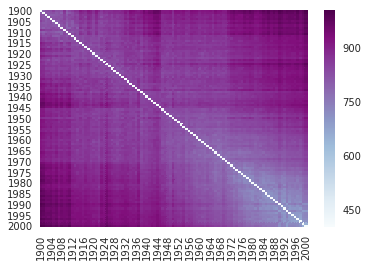

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

np.save('PIP_loss_matrix.npy', PIP_losses)
dimensions = range(PIP_losses.shape[0])
ixgrid = np.ix_(dimensions, dimensions)
real_dimension = years
plt.figure()
df = pd.DataFrame(PIP_losses[ixgrid], index=real_dimension, columns=real_dimension)
ax = sns.heatmap(df, cmap="BuPu", vmin=400)#, xticklabels=len(dimensions)-1, yticklabels=len(dimensions)-1)
fig = ax.get_figure()
fig.savefig("PIP_loss.pdf")
